# 🏆 League of Legends Win Prediction  
### Predicting Match Outcomes Using Early-Game Data (10 min)  
---
**Author:** Daniel Hamama  
**Date:** April 2025  

## 📖 Introduction


In competitive gaming, especially in popular esports titles like **League of Legends**, early-game performance can significantly impact the final outcome. 

Understanding which team has an early advantage can inform strategic decisions and enhance the overall competitive experience.

This project aims to analyze the first **10 minutes** of gameplay data from high-ranked (Diamond) matches to build a predictive model capable of determining the winning team with high accuracy. 

By exploring and visualizing early-game indicators such as gold differences, kills, and objective control, we'll uncover key insights and create actionable strategies.


## 📊 Dataset Overview

The dataset consists of **9,879 League of Legends matches**, each providing gameplay data collected at the **10-minute mark**. It includes **40 features** capturing detailed statistics for both the **Blue** and **Red** teams.

### 🔹 **Key Features:**
- **Team Objectives:** Towers destroyed, dragons/heralds taken.
- **Player Performance Metrics:** Kills, deaths, assists, average level.
- **Resource Control:** Total gold, total experience, minion and jungle minion kills.
- **Vision and Map Control:** Wards placed and destroyed.

### 🎯 **Target Variable:**
- `blueWins`: A binary indicator where:
    - `1` indicates the Blue team won the match.
    - `0` indicates the Red team won the match.

The goal of the analysis is to accurately predict match outcomes based solely on early-game statistics.


## 🛠️ Analysis Plan


The project will be structured as follows:

1. **Exploratory Data Analysis (EDA):**
   - Understand feature distributions and identify influential indicators.
   - Visualize correlations between early-game metrics and match outcomes.

2. **Feature Engineering:**
   - Create additional meaningful metrics to enhance predictive power.
   - Identify and address feature redundancy or multicollinearity.

3. **Visual Analysis and Feature Significance:**
   - Explore how existing or newly added features differ between match outcomes.
   - Get a sense of their impact and analyze wether or not our assumptions are correct.

4. **Predictive Modeling:**
   - Train and evaluate multiple classification models (Logistic Regression, Random Forest, XGBoost).
   - Optimize model performance through cross-validation and hyperparameter tuning.

5. **Interpretation & Strategic Insights:**
   - Clearly articulate the importance of features influencing match outcomes.
   - Provide actionable recommendations based on analytical findings.

6. **Conclusion & Future Work:**
   - Summarize key findings and discuss potential future improvements or applications.


## 📦 Importing Libraries and Loading the Dataset

We start by importing essential libraries for data analysis, visualization, and machine learning, and then load our dataset.


In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries (for later stages)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import shap



# Statistical Analysis libraries
from scipy.stats import ttest_ind

# Set visual style for seaborn
sns.set_style('whitegrid')

# Load the dataset
data = pd.read_csv('high_diamond_ranked_10min.csv')

# Preview the data
data.head()


c:\Users\ADMIN\anaconda3\envs\py310_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## 📊 Exploratory Data Analysis (EDA)


In this step, we'll analyze and visualize our dataset to understand its structure, identify potential issues, and uncover initial insights. The primary tasks are:

- **Data Cleaning**: Checking for missing values, duplicates, and inconsistencies.
- **Data Exploration**: Understanding feature distributions and correlations.
- **Visual Analysis**: Highlighting relationships between early-game features and match outcomes.


### 🧹 Data Cleaning

In [2]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum().sort_values(ascending=False))

Missing Values:
 gameId                          0
blueWins                        0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestroyed              0
redTotalGold                    0
redAvgLevel                     0
redTotalExperience              0
redTotalMinionsKilled           0
redTotalJungleMinionsKilled     0
redGoldDiff                     0
redExperienceDiff               0
redCSPerMin                     0
redWardsPlaced                  0
blueGoldPerMin                  0
blueCSPerMin                    0
blueDragons                     0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                    

In [3]:
# Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 0


In [4]:
# Basic dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

### 🔎 Target Variable Exploration (`blueWins`)

We first visualize the distribution of our target variable to ensure there's no imbalance that might bias our models.


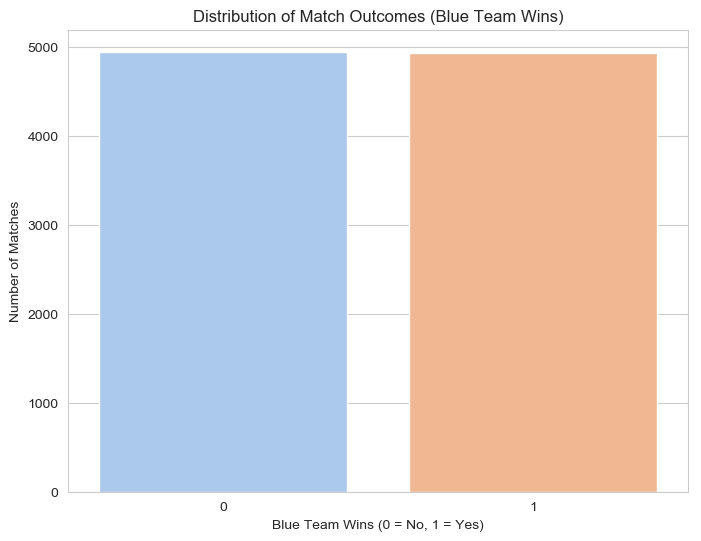

In [5]:
# Visualizing target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='blueWins', data=data, palette='pastel')
plt.title('Distribution of Match Outcomes (Blue Team Wins)')
plt.xlabel('Blue Team Wins (0 = No, 1 = Yes)')
plt.ylabel('Number of Matches')
plt.show()


### 📌 Correlation Analysis

Next, we analyze correlations between features and our target variable. This step helps identify the strongest indicators influencing match outcomes at the 10-minute mark.


Top Positive Correlations:
 blueWins               1.000000
blueGoldDiff           0.511119
blueExperienceDiff     0.489558
blueTotalGold          0.417213
blueGoldPerMin         0.417213
blueTotalExperience    0.396141
Name: blueWins, dtype: float64

Top Negative Correlations:
 redTotalExperience   -0.387588
redGoldPerMin        -0.411396
redTotalGold         -0.411396
redExperienceDiff    -0.489558
redGoldDiff          -0.511119
Name: blueWins, dtype: float64


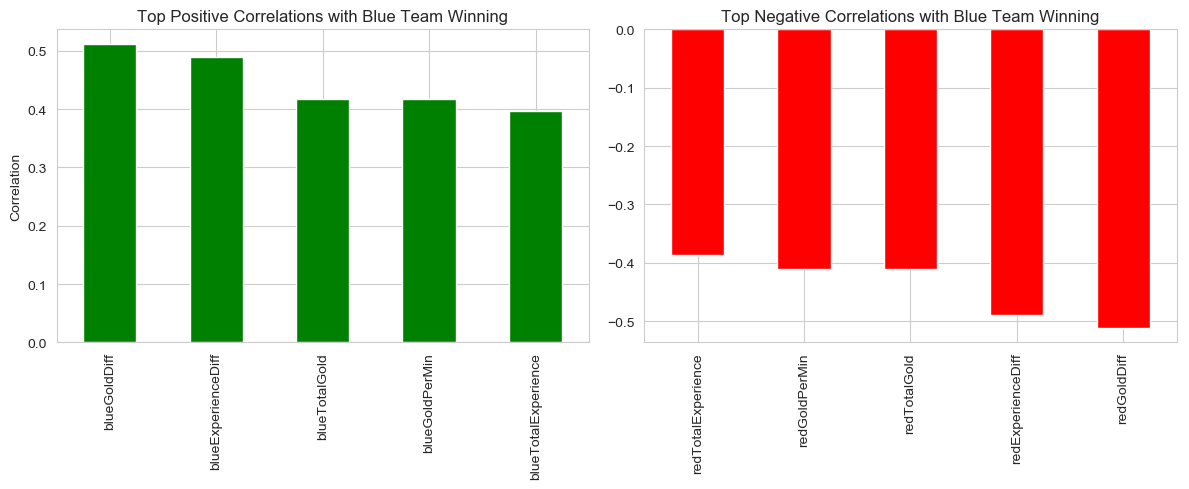

In [6]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Extract correlations with the target variable
win_corr = corr_matrix['blueWins'].sort_values(ascending=False)

# Display top correlations
print("Top Positive Correlations:\n", win_corr.head(6))
print("\nTop Negative Correlations:\n", win_corr.tail(5))

# Visualize correlations
plt.figure(figsize=(12,5))

# Top positive correlations
plt.subplot(1,2,1)
win_corr.head(6).drop('blueWins').plot(kind='bar', color='green')
plt.title('Top Positive Correlations with Blue Team Winning')
plt.ylabel('Correlation')

# Top negative correlations
plt.subplot(1,2,2)
win_corr.tail(5).plot(kind='bar', color='red')
plt.title('Top Negative Correlations with Blue Team Winning')

plt.tight_layout()
plt.show()


### 🔬 Analyzing Feature Distributions by Match Outcome

To understand how early-game features influence match outcomes, we'll compare the distributions of key features for matches **won** by the Blue team against those **lost** by the Blue team.

This comparative approach will highlight the distinguishing characteristics that typically lead to victory.


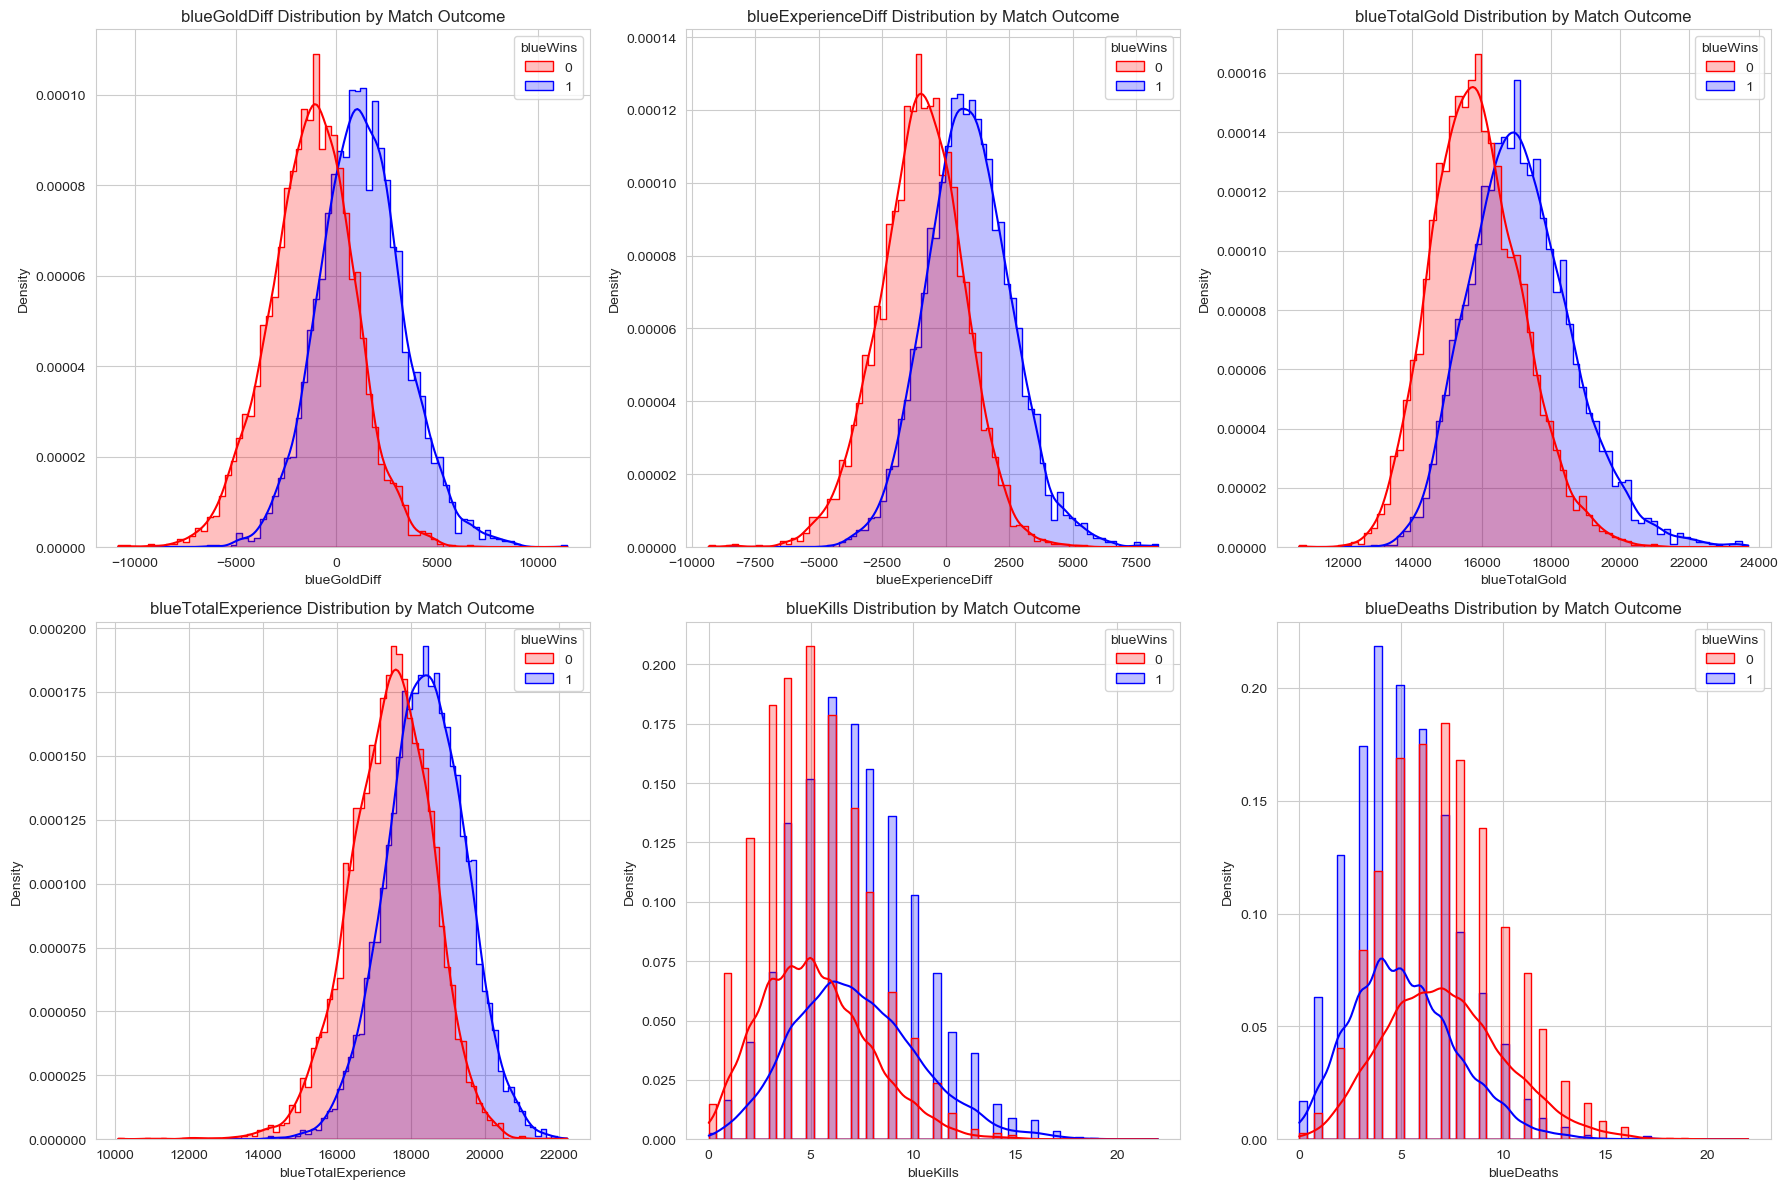

In [7]:
# Select key features for deeper analysis
key_features = ['blueGoldDiff', 'blueExperienceDiff', 'blueTotalGold', 'blueTotalExperience', 'blueKills', 'blueDeaths']

# Set up subplots
plt.figure(figsize=(18, 12))

# Loop through features to plot distributions by match outcome
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, hue='blueWins', kde=True, palette=['red', 'blue'], element='step', stat='density')
    plt.title(f'{feature} Distribution by Match Outcome')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


#### 📝 Summary: Feature Distributions by Match Outcome

Key differences emerge when comparing matches the Blue team won vs. lost:

- **Gold & Experience Diff:** Wins are strongly associated with positive early gold and XP leads.
- **Total Gold & Experience:** Higher overall resources at 10 minutes correlate with victory.
- **Kills vs. Deaths:** Blue wins often involve more kills and fewer deaths, highlighting effective early aggression.



## 🧪 Feature Engineering


In this step, we create new features that could improve model performance and remove redundant or mirrored variables.

- **Dropped**: Redundant or mirrored metrics (e.g., Red team gold/XP diffs, first blood mirror, per-minute stats).
- **Added**: KDA for both teams to better reflect combat performance.
- **Cleansed**: Outliers in ward placements capped using IQR-based clipping to preserve realistic values.

These engineered features will serve as inputs to our classification models in the next step.


In [8]:
df = data.copy()

In [9]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [10]:
# Create KDA features
df['blueKDA'] = (df['blueKills'] + df['blueAssists']) / np.where(df['blueDeaths'] == 0, 1, df['blueDeaths'])
df['redKDA']  = (df['redKills']  + df['redAssists']) / np.where(df['redDeaths'] == 0, 1, df['redDeaths'])


In [11]:
# Drop non-informative, redundant, or mirrored features
df.drop(columns=[
    'gameId',
    'blueCSPerMin', 'redCSPerMin',
    'blueGoldPerMin', 'redGoldPerMin',
    'blueAvgLevel', 'redAvgLevel',
    'redFirstBlood',
    'redGoldDiff', 'redExperienceDiff',
    'blueTotalGold', 'redTotalGold',
    'blueTotalExperience', 'redTotalExperience',
    'blueKills', 'blueAssists', 'blueDeaths',
    'redKills', 'redAssists', 'redDeaths'
], inplace=True)

In [12]:
# Cap extreme outliers in WardsPlaced using IQR
def cap_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)

df['blueWardsPlaced'] = cap_iqr_outliers(df['blueWardsPlaced'])
df['redWardsPlaced'] = cap_iqr_outliers(df['redWardsPlaced'])


In [13]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,...,redWardsPlaced,redWardsDestroyed,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled,blueKDA,redKDA
0,0,28.0,2,1,0,0,0,0,195,36,...,15.0,6,0,0,0,0,197,55,3.333333,1.555556
1,0,12.0,1,0,0,0,0,0,174,43,...,12.0,1,2,1,1,1,240,52,2.000000,1.400000
2,0,15.0,0,0,1,1,0,0,186,46,...,15.0,3,0,0,0,0,203,28,1.000000,3.571429
3,0,29.0,1,0,1,0,1,0,201,55,...,15.0,2,0,0,0,0,235,47,1.800000,3.750000
4,0,29.0,4,0,0,0,0,0,210,57,...,17.0,2,1,1,0,0,225,67,2.000000,2.166667


### 🎯 Visual Analysis: Key Engineered Features by Match Outcome

Before modeling, we explore how important engineered features differ between matches won and lost by the Blue team. This gives us a sense of their predictive value and helps validate our assumptions.

We'll use box plots to visualize the distributions for:
- `blueKDA`, `redKDA`
- `blueTotalMinionsKilled`, `redTotalMinionsKilled`
- `blueWardsPlaced`, `redWardsPlaced`
- `blueWardsDestroyed`, `redWardsDestroyed`
- `blueTowersDestroyed`, `redTowersDestroyed`


#### ⚔️ Combat Performance: KDA Comparison

We analyze kill/death/assist ratios for both teams to see if higher combat efficiency correlates with winning.


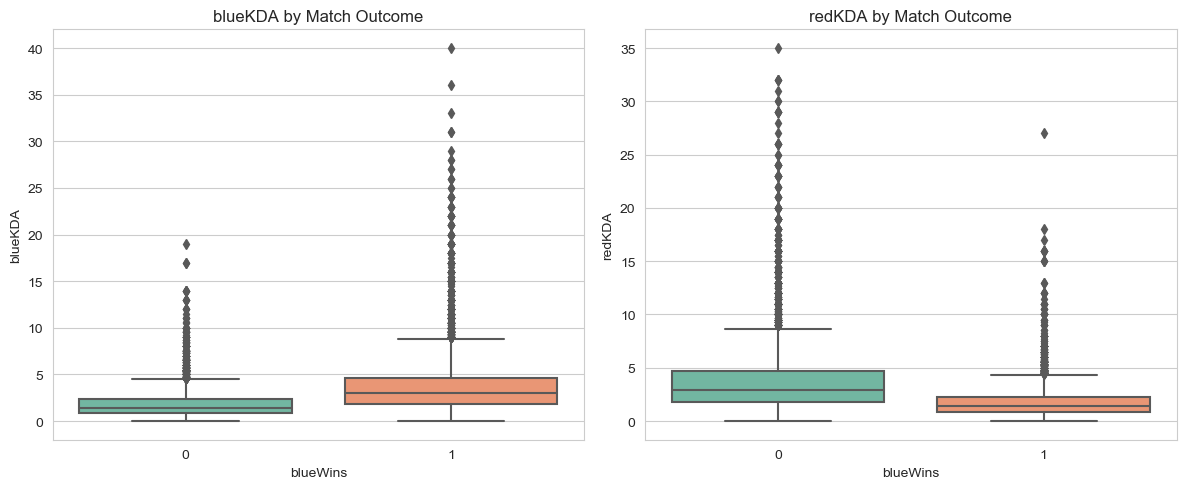

In [14]:
features = ['blueKDA', 'redKDA']

plt.figure(figsize=(12, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='blueWins', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Match Outcome')
plt.tight_layout()
plt.show()


#### 🔭 Vision Control: Wards Placed & Destroyed

Warding reveals enemy movements and denies vision — we test if effective vision control is a predictor of victory.


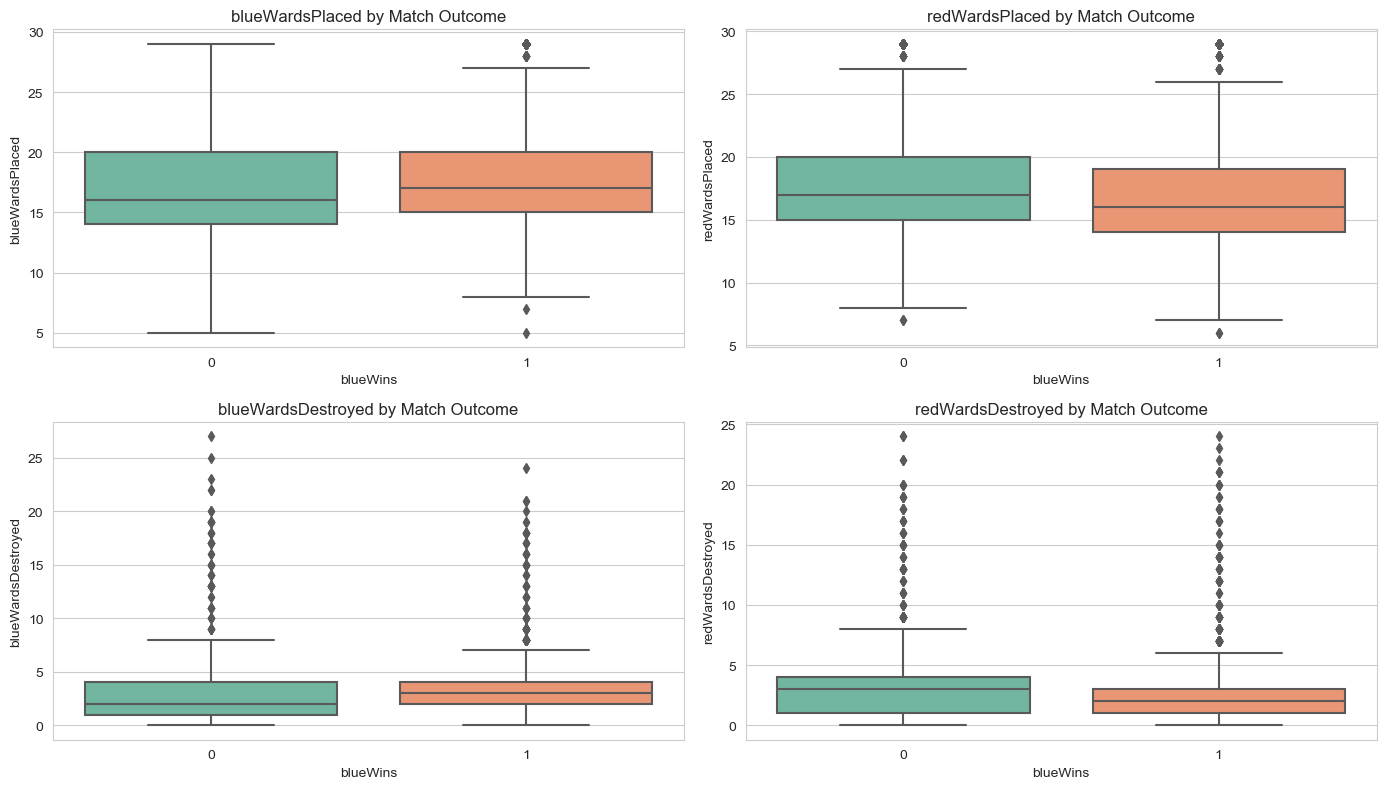

In [15]:
features = ['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='blueWins', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Match Outcome')
plt.tight_layout()
plt.show()


#### 👾 Farming & Resource Efficiency: Minions Killed

Minion kills generate gold and XP. We analyze whether stronger lane farming leads to higher win probability.


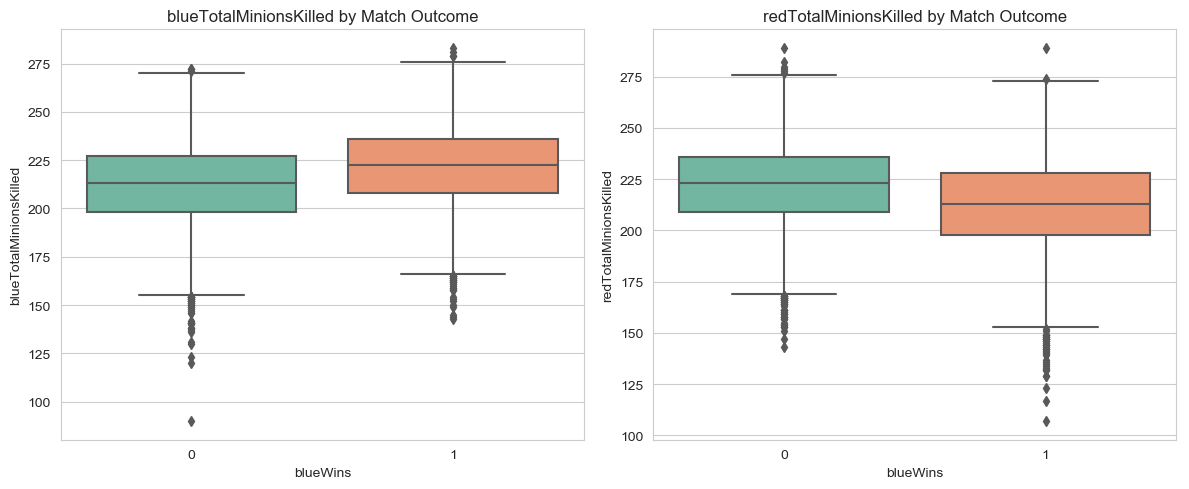

In [16]:
features = ['blueTotalMinionsKilled', 'redTotalMinionsKilled']

plt.figure(figsize=(12, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='blueWins', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Match Outcome')
plt.tight_layout()
plt.show()


#### 🏰 Objective Control: Towers Destroyed

Early tower pressure can determine map dominance. We compare the number of towers destroyed by each team at 10 minutes.


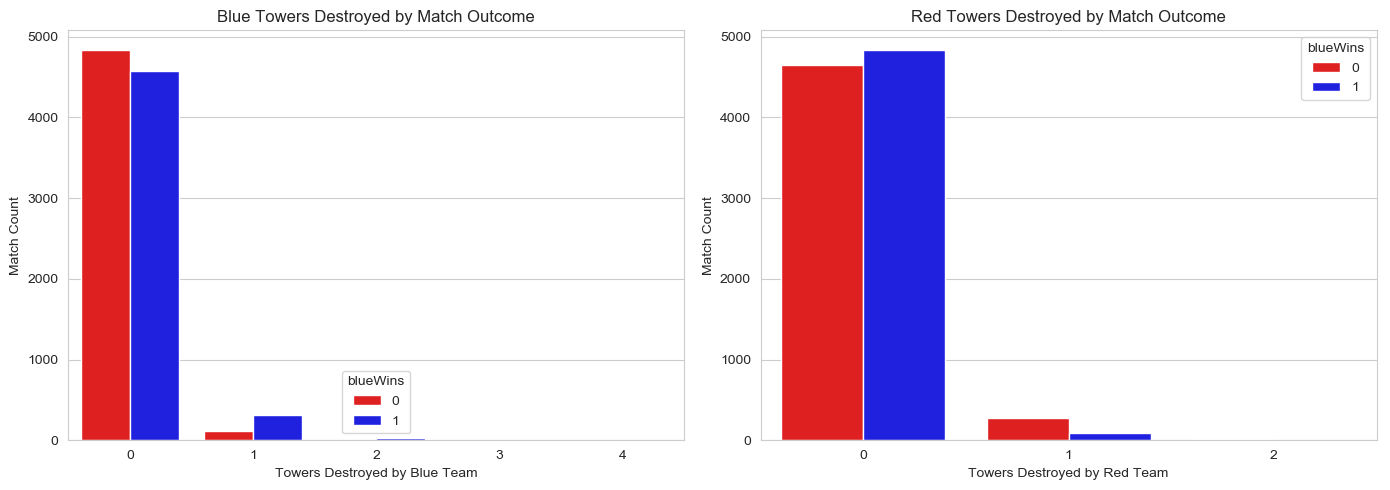

In [17]:
# Towers destroyed visualization using count plot
team_palette = {0: 'red', 1: 'blue'}
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='blueTowersDestroyed', hue='blueWins', data=df, palette=team_palette, ax=axs[0])
axs[0].set_title('Blue Towers Destroyed by Match Outcome')
axs[0].set_xlabel('Towers Destroyed by Blue Team')
axs[0].set_ylabel('Match Count')

sns.countplot(x='redTowersDestroyed', hue='blueWins', data=df, palette=team_palette, ax=axs[1])
axs[1].set_title('Red Towers Destroyed by Match Outcome')
axs[1].set_xlabel('Towers Destroyed by Red Team')
axs[1].set_ylabel('Match Count')

plt.tight_layout()
plt.show()


### 🧪 Statistical Analysis: T-Tests for Feature Significance

To quantify the difference in means between match outcomes, we conduct independent t-tests for selected features.

This tells us whether the average value of each feature is significantly different between wins and losses for the Blue team.

✅ Significant = Heavily affects match outcome.

❌ Not significant = Doesn't affects match outcome very much.


In [18]:
from scipy.stats import ttest_ind

# Grouping all relevant features from our visuals
features_to_test = [
    'blueKDA', 'redKDA',
    'blueWardsPlaced', 'redWardsPlaced',
    'blueWardsDestroyed', 'redWardsDestroyed',
    'blueTotalMinionsKilled', 'redTotalMinionsKilled',
    'blueTowersDestroyed', 'redTowersDestroyed'
]

print("T-Test Results:\n")
for feature in features_to_test:
    win_group = df[df['blueWins'] == 1][feature]
    lose_group = df[df['blueWins'] == 0][feature]
    t_stat, p_value = ttest_ind(win_group, lose_group, equal_var=False)
    result = "✅ Significant" if p_value < 0.05 else "❌ Not significant"
    print(f"{feature:>25}: T = {t_stat:>6.2f} | P = {p_value:>8.4f} → {result}")


T-Test Results:

                  blueKDA: T =  37.50 | P =   0.0000 → ✅ Significant
                   redKDA: T = -37.25 | P =   0.0000 → ✅ Significant
          blueWardsPlaced: T =   2.74 | P =   0.0061 → ✅ Significant
           redWardsPlaced: T =  -4.14 | P =   0.0000 → ✅ Significant
       blueWardsDestroyed: T =   4.40 | P =   0.0000 → ✅ Significant
        redWardsDestroyed: T =  -5.51 | P =   0.0000 → ✅ Significant
   blueTotalMinionsKilled: T =  22.94 | P =   0.0000 → ✅ Significant
    redTotalMinionsKilled: T = -21.57 | P =   0.0000 → ✅ Significant
      blueTowersDestroyed: T =  11.55 | P =   0.0000 → ✅ Significant
       redTowersDestroyed: T = -10.37 | P =   0.0000 → ✅ Significant


### 📈 Summary of Visuals and Statistical Insights


The t-tests confirm that every key feature analyzed shows a statistically significant difference between matches **won** and **lost** by the Blue team (**p < 0.05** across the board). This supports the inclusion of these features in predictive modeling.

#### ✅ Key Takeaways from the Visuals:
- **KDA (Blue and Red):** Strongest predictors of match outcome — clear separation between winners and losers.
- **Warding (Placed & Destroyed):** Better vision control, especially **wards destroyed**, correlates with wins.
- **Minions Killed (Both Teams):** Early-game farming efficiency is highly associated with match success.
- **Towers Destroyed:** As expected, more early objective pressure is linked to higher win rates.


## 🔮 Predictive Modeling: League of Legends Match Outcome



In this phase, we build and evaluate machine learning models to predict the Blue team's match outcome using early-game statistics.

We'll use:
- **XGBoost Classifier** for strong, optimized prediction power.
- **Cross-validation** to validate model stability.
- **Feature Importance Analysis** to identify key drivers of match success.

Evaluation Metrics:
- Accuracy
- Precision, Recall, F1-Score
- Confusion Matrix
- ROC-AUC Score

### ✂️ Train-Test Split

We split the dataset into training and testing sets to evaluate model generalization on unseen data.


In [19]:
# Splitting features (X) and target (y)
X = df.drop(columns=['blueWins'])
y = df['blueWins']

print(f"Feature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")


Feature matrix X shape: (9879, 21)
Target vector y shape: (9879,)


In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 7903 samples
Testing set size: 1976 samples


### 🧠 Model Training: XGBoost Classifier

We train an XGBoost Classifier.


In [21]:
# Initialize basic XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### 🔁 Cross-Validation (CV)

We perform 5-fold cross-validation to estimate the model's stability.

We'll calculate:
- Accuracy
- Precision
- Recall
- F1-Score


In [22]:
# Setup Stratified K-Fold (preserve class balance in folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate different metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation for each metric
cv_results = {}
for metric in scoring.keys():
    scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring=scoring[metric])
    cv_results[metric] = scores
    print(f"{metric.capitalize()} CV Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


Accuracy CV Mean: 0.7233 | Std: 0.0104
Precision CV Mean: 0.7263 | Std: 0.0159
Recall CV Mean: 0.7160 | Std: 0.0242
F1 CV Mean: 0.7208 | Std: 0.0114


### 🧪 Test Set Evaluation

After validating the model using cross-validation, we now evaluate its performance on the unseen test set.

We'll calculate:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- ROC-AUC Score


In [23]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)


In [24]:
# Evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       990
           1       0.72      0.72      0.72       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



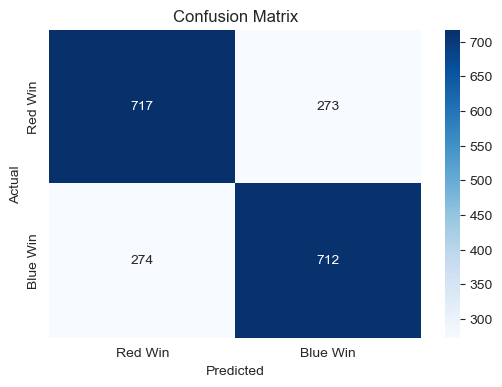

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red Win', 'Blue Win'], yticklabels=['Red Win', 'Blue Win'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ROC-AUC Score: 0.8019


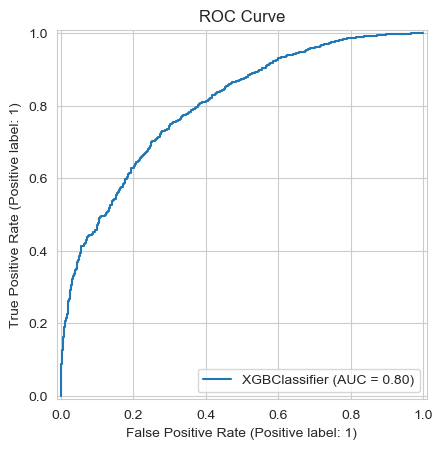

In [26]:
# ROC-AUC Score
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve Display
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

### 🎯 Feature Importance Analysis

To understand which early-game metrics most strongly influence match outcomes, we analyze the feature importances derived from the trained XGBoost model.

We'll use:
- Built-in model feature importance
- SHAP values


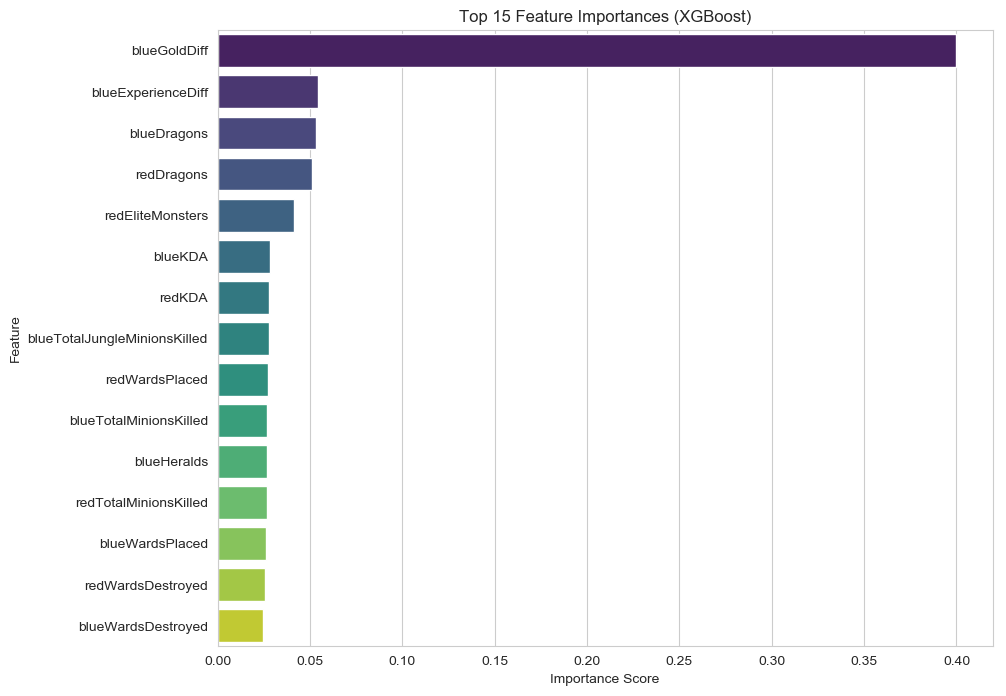

,Feature,Importance
9,blueGoldDiff,0.399603
10,blueExperienceDiff,0.054286
4,blueDragons,0.053139
14,redDragons,0.051278
13,redEliteMonsters,0.041596
19,blueKDA,0.028156
20,redKDA,0.027902
8,blueTotalJungleMinionsKilled,0.027683
11,redWardsPlaced,0.027166
7,blueTotalMinionsKilled,0.026721


In [27]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Show feature table
feat_imp_df.head(20)


### 📈 Key Insights from Feature Importance

Our XGBoost model revealed the following key drivers for predicting match outcomes:

- **Gold Advantage** and **Experience Advantage** at 10 minutes are by far the strongest predictors of victory.
- **Early Objective Control** (especially dragons and elite monsters) significantly influences match success.
- **Combat Efficiency (KDA)** is important but secondary to raw economic advantages.
- **Vision Control** (wards placed/destroyed) contributes marginally but is not as decisive as other factors.

In essence, early-game **resource control** and **objective pressure** are critical to determining match outcomes in high-level League of Legends play.


### 🧠 SHAP Value Analysis (Diving Deeper)

To better understand how individual features influence the model's predictions, we use SHAP values. This provides a detailed, interpretable breakdown of feature impacts at the sample level.

We visualize:
- Global feature importance (SHAP summary plot)
- How each feature affects the output (positive or negative impact)


In [28]:
# Create TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)


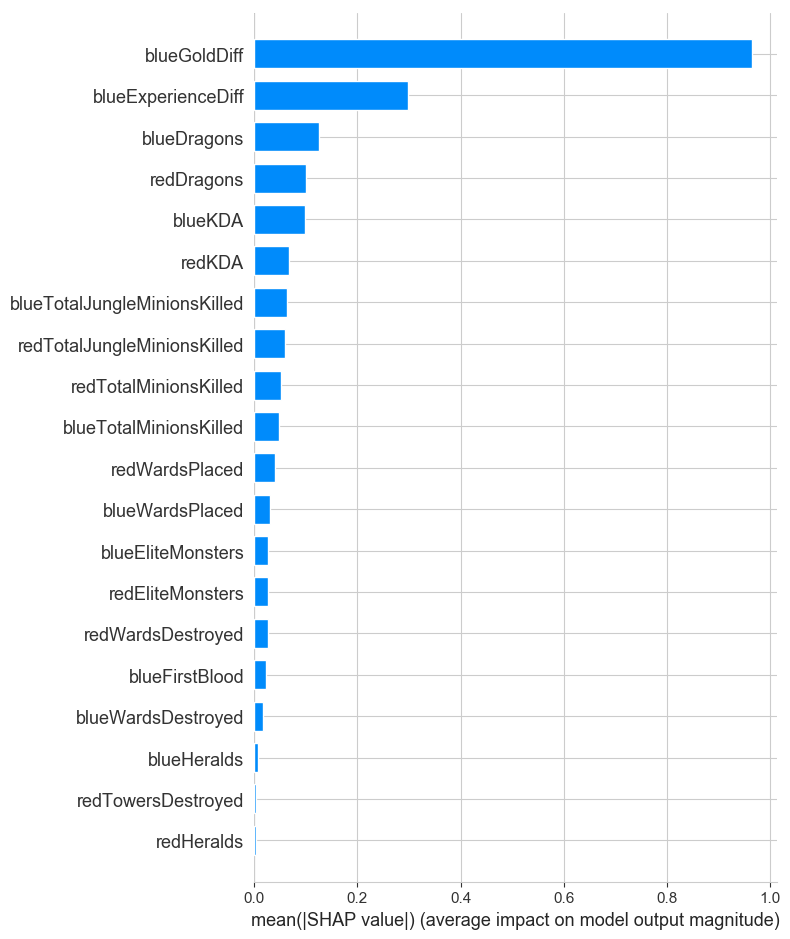

In [29]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


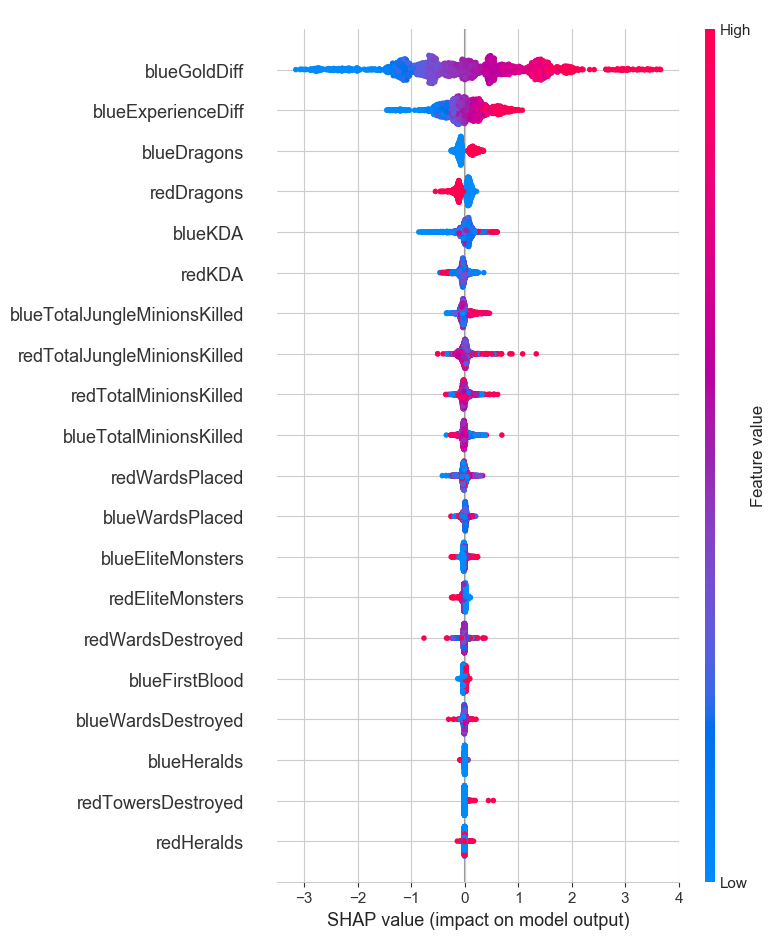

In [30]:
# SHAP beeswarm plot
shap.summary_plot(shap_values, X_test)


### 🔍 SHAP Value Insights

The SHAP analysis confirms:

- **blueGoldDiff** and **blueExperienceDiff** have the largest impact on model predictions, heavily pushing outcomes toward wins when they are high.
- **Objective control** (blueDragons, redDragons) moderately influences predictions.
- **Combat efficiency (KDA)** and **farming efficiency** contribute, but less decisively.
- **Vision control** metrics have minor predictive influence at 10 minutes.

This reinforces the critical role of early resource advantages in competitive League of Legends matches.


## 🎯 Hyperparameter Tuning for XGBoost


After evaluating our baseline XGBoost model, we now perform hyperparameter tuning to further improve model performance.

Approach:
- RandomizedSearchCV (efficient)
- 5-Fold Stratified Cross-Validation
- Scoring based on F1-Score (balanced metric)

Key parameters we tune:
- `n_estimators` (number of trees)
- `max_depth` (tree depth)
- `learning_rate` (step size)
- `subsample` (row sampling)
- `colsample_bytree` (feature sampling)
- `gamma` (minimum loss reduction to make split)
- `min_child_weight` (minimum weight to split node)

### RandomizedSearchCV

In [31]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7]
}

# Initialize new XGBClassifier
xgb_tune = XGBClassifier(random_state=42, eval_metric='logloss')

# Setup Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_tune,
    param_distributions=param_grid,
    n_iter=50,  # Number of random settings to try
    scoring='f1',  # Optimize based on F1 score
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters Found:\n", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters Found:
 {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [32]:
# Train new XGBClassifier with best params
best_xgb_model = XGBClassifier(
    subsample=0.7,
    n_estimators=200,
    min_child_weight=3,
    max_depth=3,
    learning_rate=0.01,
    gamma=0.1,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Fit on full training data
best_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [33]:
# Setup Stratified K-Fold (preserve class balance in folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate different metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation for each metric
cv_results = {}
for metric in scoring.keys():
    scores = cross_val_score(best_xgb_model, X_train, y_train, cv=cv, scoring=scoring[metric])
    cv_results[metric] = scores
    print(f"{metric.capitalize()} CV Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


Accuracy CV Mean: 0.7309 | Std: 0.0131
Precision CV Mean: 0.7349 | Std: 0.0143
Recall CV Mean: 0.7211 | Std: 0.0228
F1 CV Mean: 0.7277 | Std: 0.0147


### Evaluation

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       990
           1       0.72      0.72      0.72       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



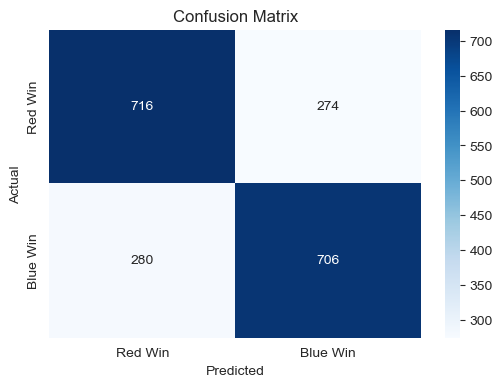

ROC-AUC Score: 0.8061


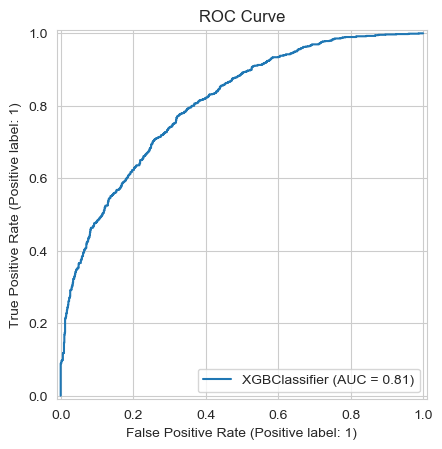

In [34]:
# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluation metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red Win', 'Blue Win'], yticklabels=['Red Win', 'Blue Win'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC-AUC Score
y_pred_prob = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: ROC Curve Display
RocCurveDisplay.from_estimator(best_xgb_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()


### Feature Importance using SHAP

Let's perform SHAP feature importance analysis again on the new model and evaluations

In [35]:
# Create new TreeExplainer for the tuned model
explainer_best = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values on test set
shap_values_best = explainer_best.shap_values(X_test)

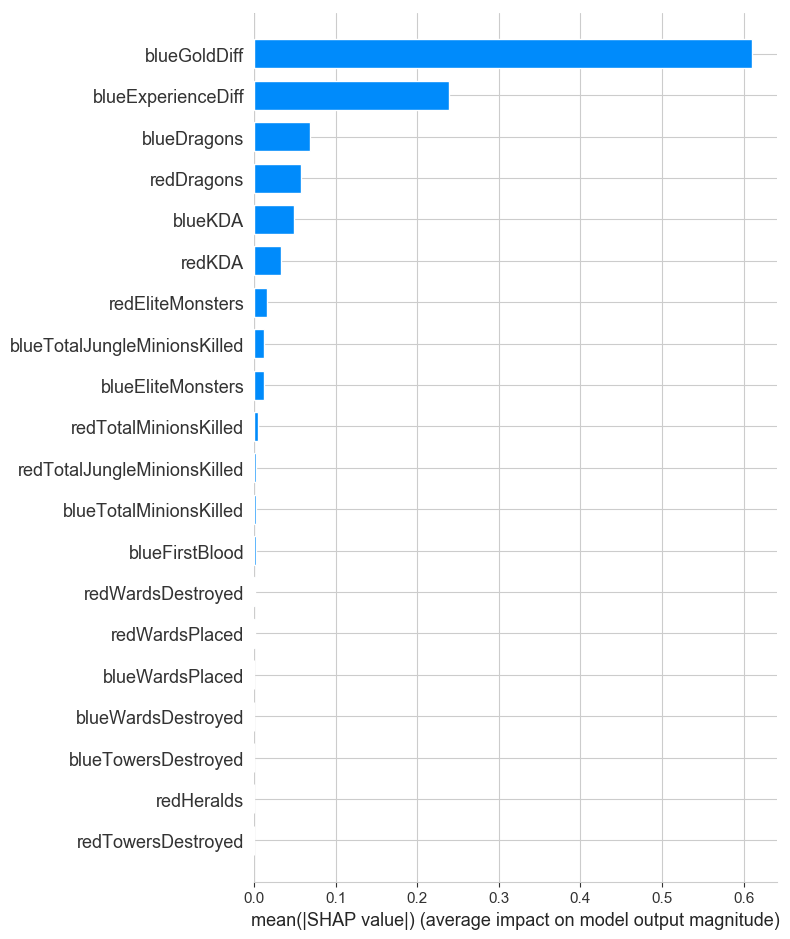

In [36]:
# SHAP summary bar plot for tuned model
shap.summary_plot(shap_values_best, X_test, plot_type="bar")


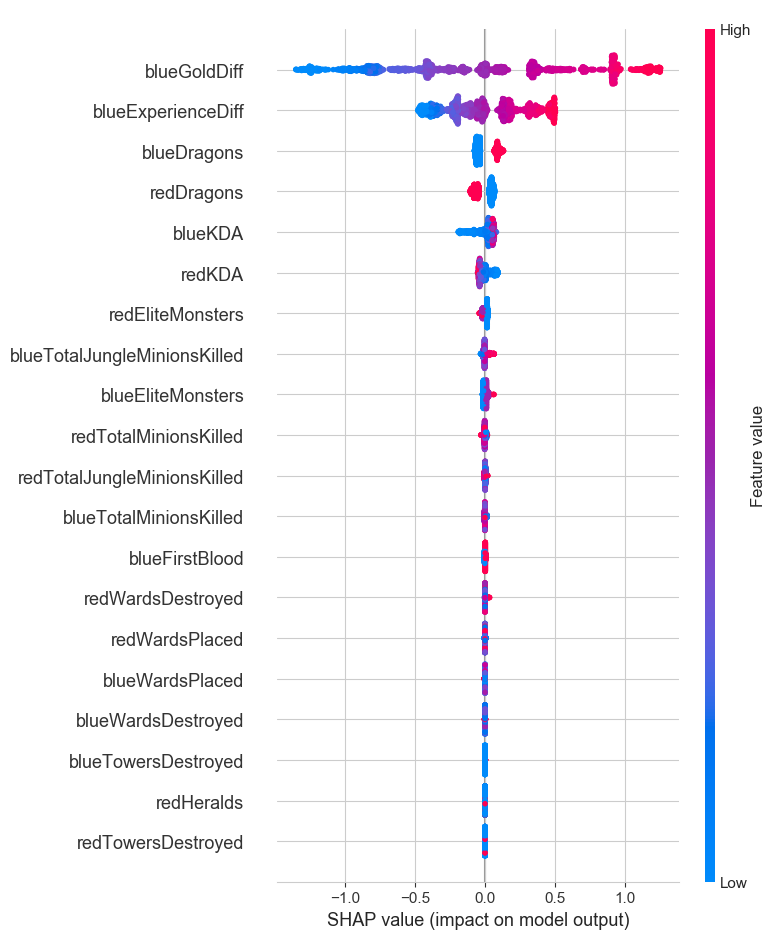

In [37]:
# SHAP beeswarm plot for tuned model
shap.summary_plot(shap_values_best, X_test)


### 🔍 SHAP Insights After Tuning

After hyperparameter tuning, SHAP analysis shows:

- **blueGoldDiff** and **blueExperienceDiff** remain the dominant predictors, but with slightly reduced extreme influence, indicating better generalization.
- Minor features (minions killed, wards, heralds) have even smaller contributions post-tuning.
- The model has become less sensitive to outlier values, focusing on consistent predictors.

Hyperparameter tuning led to a more stable and interpretable model without losing key predictive drivers.


## 📚 Final Conclusion

In this project, we built a machine learning pipeline to predict match outcomes in high-level League of Legends games based on the first 10 minutes of gameplay.

Key Achievements:
- Conducted thorough **EDA**, uncovering early-game trends related to victory.
- Engineered critical features such as **KDA ratios** and **economic advantages**.
- Built an **XGBoost baseline model** achieving ~72% F1-Score and ~80% ROC-AUC.
- Used **SHAP analysis** to interpret model predictions and identify key winning factors, notably **gold difference** and **experience difference**.
- **Hyperparameter tuning** further improved model stability and performance.

**Primary Insights:**
- **Gold and experience advantages** at 10 minutes are the most decisive factors for predicting match outcomes.
- **Early objective control** (dragons, elite monsters) moderately influences match results.
- **Vision control** (wards placed/destroyed) has a smaller, yet still relevant, impact.

This project demonstrates the power of early-game metrics in forecasting outcomes and showcases advanced techniques like SHAP-based model interpretation.


## 🚀 Future Work and Next Steps


While the current model provides strong results, future improvements could include:

- **Time-Series Expansion:** Incorporating evolving features over time (e.g., gold over time) for dynamic modeling.
- **More Complex Features:** Including champion-specific stats, lane assignments, and jungle control.
- **Model Ensemble:** Combining multiple models (e.g., LightGBM + XGBoost) for further gains.
- **Early-Game Strategy Clustering:** Using clustering to profile different early-game strategies and their win rates.
- **Web App Deployment:** Creating a simple app where players input early-game stats and receive win probability estimates.

Additionally, experimentation with models like **CatBoost** or even **deep learning approaches** (e.g., LSTMs for sequences) could unlock further predictive power.
